In [1]:
greeting = "Assalam-o-Alaikum!"
greeting

'Assalam-o-Alaikum!'

### Iris Dataset

In [7]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
ir = pd.DataFrame(iris.data)
ir.columns = iris.feature_names
ir["CLASS"] = iris.target
ir.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors = 5)
nn.fit(iris.data)

NearestNeighbors()

In [9]:
ir.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
#creating a test data

import numpy as np
test = np.array([5.4, 2, 2, 2.3])
test1 = test.reshape(1, -1)
test1.shape

(1, 4)

In [11]:
nn.kneighbors(test1, 5)

(array([[1.6673332 , 1.90525589, 1.94679223, 2.02484567, 2.09523268]]),
 array([[98, 93, 57, 60, 79]], dtype=int64))

In [12]:
ir.iloc[[98, 93, 57, 60, 79], ]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
98,5.1,2.5,3.0,1.1,1
93,5.0,2.3,3.3,1.0,1
57,4.9,2.4,3.3,1.0,1
60,5.0,2.0,3.5,1.0,1
79,5.7,2.6,3.5,1.0,1


### KNeighborsClassifier Algorithm

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

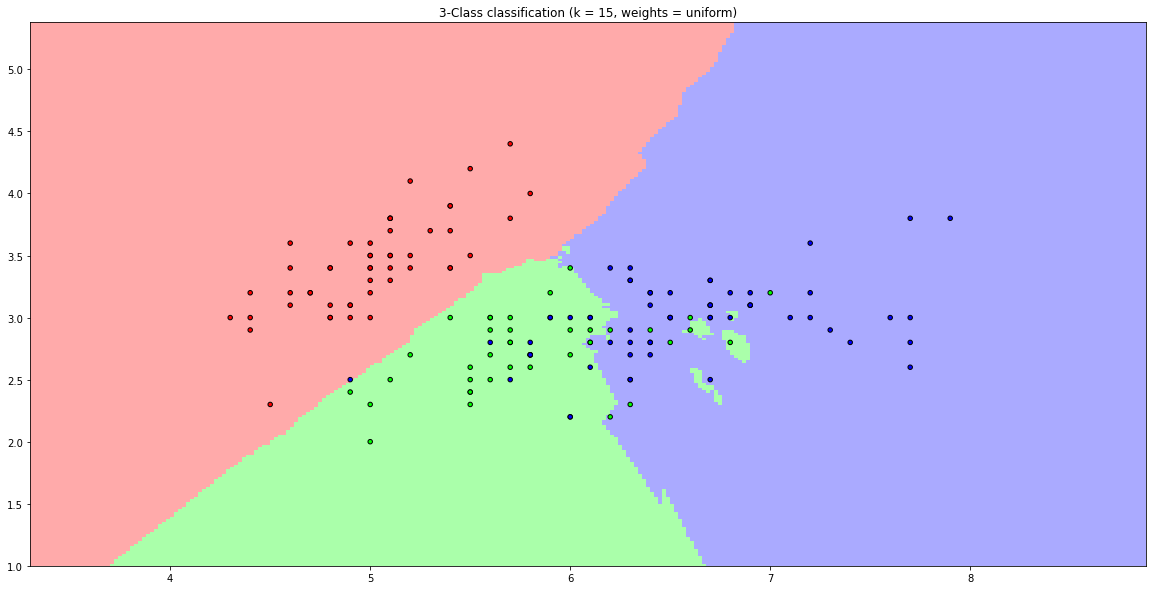

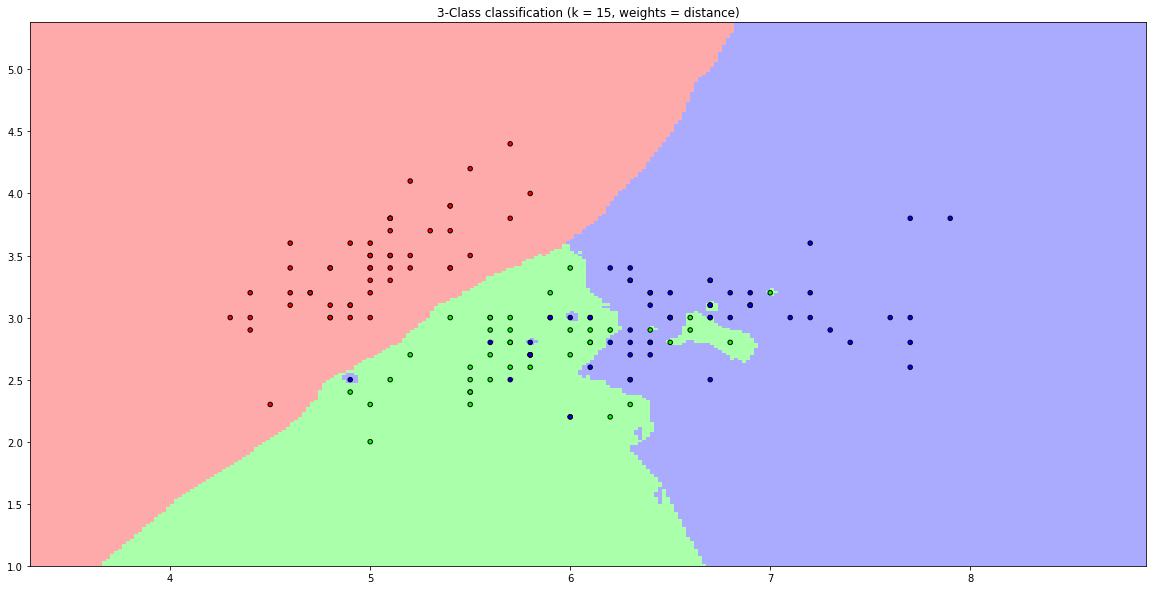

In [20]:
n_neighbors = 15
X = iris.data[:, :2]
y = iris.target

h = 0.02    # step size in mesh

cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

for weights in ["uniform", "distance"]:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
    clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize = (20, 10))
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold, edgecolor = "k", s = 20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {n_neighbors}, weights = {weights})")
    
plt.show()

### KNN Classifiers Algorithm - How it works?

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [28]:
knn

KNeighborsClassifier(n_neighbors=1)

In [29]:
features = iris.data[: , [0,1,2,3]]

featuresAll = []
for observation in features:
    featuresAll.append([observation[0] + observation[1] + observation[2] + observation[3]])

In [39]:
featuresAll = []
targets = []
for feature in features:
    featuresAll.append(feature[0]) #Sepal length
    targets.append(feature[1]) #sepal width

In [40]:
featuresAll = []
targets = []
for feature in features:
    featuresAll.append(feature[2]) #Petal length
    targets.append(feature[3]) #Petal width

In [41]:
X1 = np.asarray(featuresAll)
X1 = X1.reshape(-1, 1)
X1.shape

(150, 1)

In [42]:
y = iris.target
y.shape

(150,)

In [43]:
knn.fit(X1, y)

KNeighborsClassifier(n_neighbors=1)

In [44]:
print(knn.predict([[6.4]]))

[2]


In [46]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [47]:
knn.fit(X1, y)

KNeighborsClassifier()

In [48]:
print(knn.predict([[3.4]]))

[1]


In [49]:
print(knn.predict(np.column_stack([[1., 6.1, 3.2, 4.2]])))

[0 2 1 1]
